In [1]:
### Objective: Given the characterstics of an investor. Can we predict that investor is a high revenue customer
### or low revenue customer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In [3]:
data=pd.read_csv(r"C:\Users\ndulani\OneDrive - BMC Software, Inc\Desktop\DS\ML\Logistic Regression\Existing_Base.csv")
data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [4]:
### Target variable : Revenue Grid discrete in nature. Hence Supervised Learning --> Classification problem
# Revenue Grid column has 2 values: 1 and 2
# 1 indicates high revenue customer
# 2 indicates low revenue customer

### Sanity Check

In [5]:
# Logical Dependency: True
# Data Adequacy : True

data.shape

(10155, 31)

In [6]:
# Distribution of Target column

data['Revenue Grid'].value_counts()

#### There is class imbalance in my dataset. We might ask for more observations for class 1.

#### if the distribution is 80%-20% - generally not a major concern.
#### if the distribution is between 80%-20% and 95%-5% -  area of slight concern..
#### if the distribution around 95-5% - we should get concerned - expect that your model might be a bad model

2    9069
1    1086
Name: Revenue Grid, dtype: int64

### EDA

In [7]:
# Printing the information regarding columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  post_code                        10155 non-null  object 
 12  post_area         

In [8]:
#### Insight #####

# Out of 31 columns, we have around 18 columns of numeric type, 13 columns of string type
# There doesn't seem to have missing values in the columns.

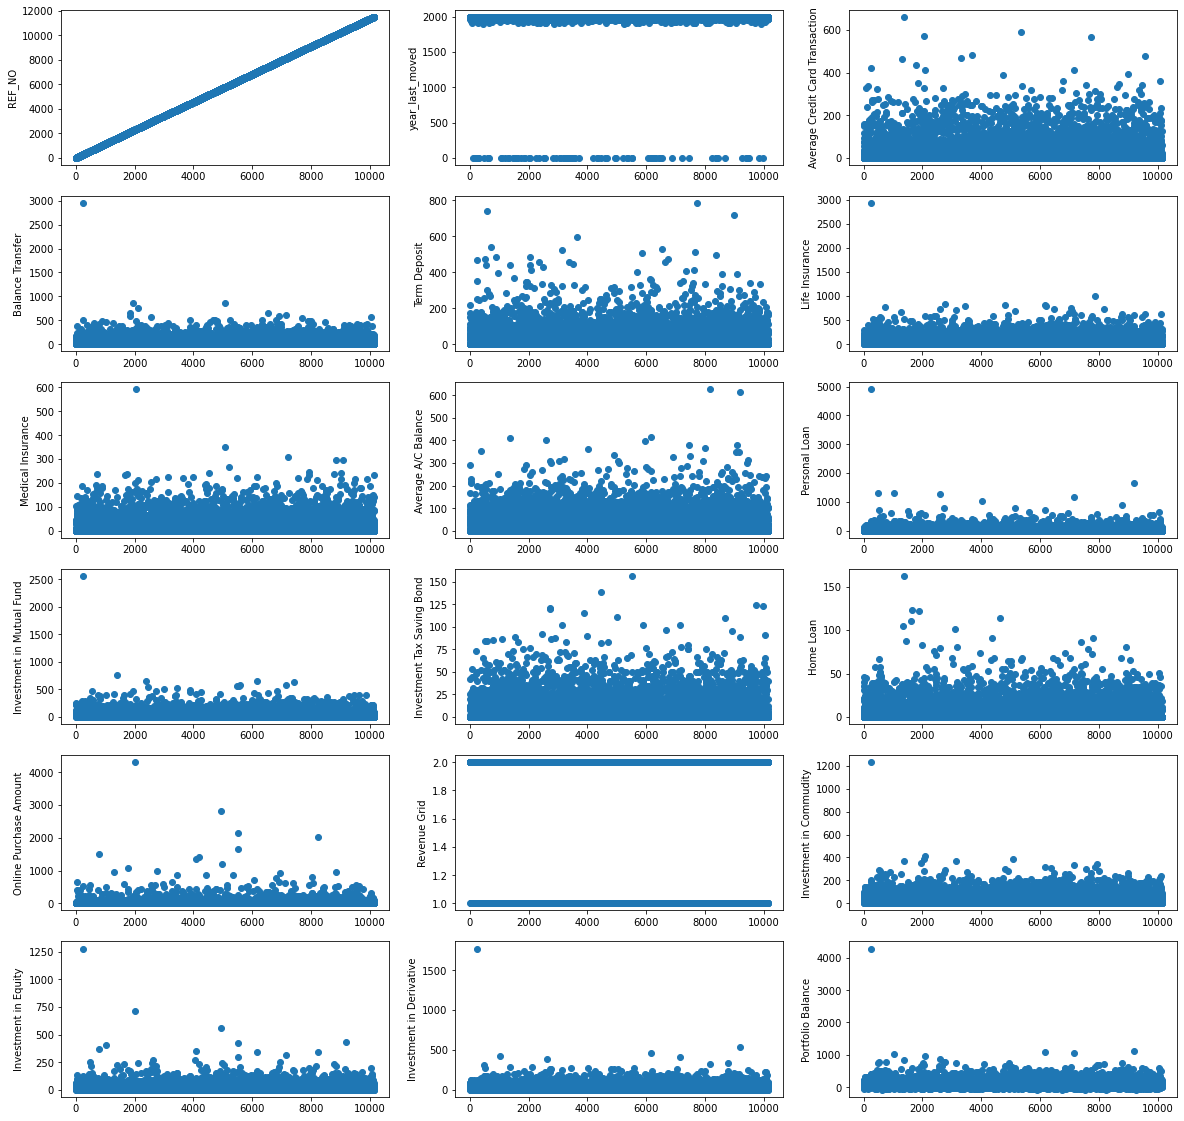

In [9]:
# Visualizing numeric columns
numeric_cols=data.select_dtypes(include=np.number) # creating dataframe with numeric columns
column_names=list(numeric_cols.columns)

col_index=0
plot_rows=6
plot_cols=3

fig,ax=plt.subplots(plot_rows,plot_cols,figsize=(20,20))
for rowcount in range(plot_rows):
    for colcount in range(plot_cols):
        ax[rowcount][colcount].scatter(y=numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[rowcount][colcount].set_ylabel(column_names[col_index])
        col_index=col_index+1

In [10]:
###### Insights #####

## Ref Number column just contains the index so can be removed.
## year_last_moved column seem to have many values close to 0 or 0, these seem to be missing values, investigate them.
## A single customer with very high value of balance transfer/life insurance etc stands out, this row could be considered outlier and be removed, #row number 250
## Capping could be done to limit the impact of outliers.
## Scaling could be done since the scale is different for most of the variables.

In [11]:
# Finding Outlier
data.loc[numeric_cols['Balance Transfer']>2500]

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
250,279,1,41-45,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,9.48,0.0,0.0,2,Male,North,1231.09,1279.1,1771.16,4283.56


In [12]:
# Year Last moved

sum(data['year_last_moved']==0)
# 84 rows out of 10k rows have zero values.
# Also, year last moved isn't helping me to predict Revenue Grid. Let's drop it

84

In [13]:
# Describing categorical columns

cat_data=data.select_dtypes(include=np.object)
cat_columns=list(cat_data.columns)

for col in cat_columns:
    print(f'Column: {col}')
    print(f'Unique: {cat_data[col].nunique()}')
    print('*****************')


Column: children
Unique: 5
*****************
Column: age_band
Unique: 13
*****************
Column: status
Unique: 5
*****************
Column: occupation
Unique: 9
*****************
Column: occupation_partner
Unique: 9
*****************
Column: home_status
Unique: 5
*****************
Column: family_income
Unique: 13
*****************
Column: self_employed
Unique: 2
*****************
Column: self_employed_partner
Unique: 2
*****************
Column: post_code
Unique: 10040
*****************
Column: post_area
Unique: 2039
*****************
Column: gender
Unique: 3
*****************
Column: region
Unique: 13
*****************


C:\Users\ndulani\AppData\Local\Temp/ipykernel_9644/3721016082.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_data=data.select_dtypes(include=np.object)


### Data Preprocessing

In [14]:
print('The shape of the data before preprocessing ', data.shape)

The shape of the data before preprocessing  (10155, 31)


In [15]:
#Preprocess - 1: Remove the post_code, post_area and Ref_no column

data.drop(['REF_NO','post_code','post_area'],axis=1,inplace=True)

In [16]:
##### Preprocess - 2: Analyze the year_last_moved column ######

print(np.sum(data['year_last_moved']==0))

##### Insight #####

# Although there aren't many 0's, the column seems to be a bit irrelevant in predicting customers with high transaction
# potential.Hence this coulumn would also be dropped

data.drop(['year_last_moved'],axis=1,inplace=True)

84


In [17]:
##### Preprocess - 3: Caping the numeric columns to 99th percentile

def capping(Series,quantile_val):
    cap_value=Series.quantile(quantile_val)
    Series[Series>cap_value]=cap_value
    return Series,cap_value

In [18]:
for col in column_names:
    if col not in ['Revenue Grid','year_last_moved','REF_NO']:
        a,b=capping(data[col],0.995)
        print(f'{col}: Capping: {b}')

Average Credit Card Transaction: Capping: 277.04189999999977
Balance Transfer: Capping: 403.1564999999984
Term Deposit: Capping: 321.1207999999996
Life Insurance: Capping: 505.8719999999998
Medical Insurance: Capping: 177.44259999999974
Average A/C Balance: Capping: 247.37879999999976
Personal Loan: Capping: 409.09669999999767
Investment in Mutual Fund: Capping: 336.0714999999982
Investment Tax Saving Bond: Capping: 68.20589999999986
Home Loan: Capping: 54.0886999999997
Online Purchase Amount: Capping: 465.6838999999965
Investment in Commudity: Capping: 219.34139999999994
Investment in Equity: Capping: 166.57359999999986
Investment in Derivative: Capping: 199.18799999999976
Portfolio Balance: Capping: 545.2546999999988


C:\Users\ndulani\AppData\Local\Temp/ipykernel_9644/1902283864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series[Series>cap_value]=cap_value


In [19]:
#### Preprocess-4 Dropping outlier row

data.drop(250,inplace=True)

In [20]:
# Finding numeric cols
numeric_cols = data.select_dtypes(include = np.number) ### find the numeric columns
column_names = list(numeric_cols.columns)
data[column_names].describe()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000
mean,23.042085,45.674234,27.021307,65.370251,18.908738,31.726937,24.441704,41.577281,6.008767,4.379844,17.049523,1.893047,36.183206,21.162010,31.519148,89.336002
std,48.071901,70.025101,49.766444,87.601509,30.801414,43.194477,57.606266,55.281344,12.159193,9.221872,54.124517,0.309069,39.025411,25.529092,33.002452,94.445107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-78.430000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.215000,4.670000,8.740000,26.602500
50%,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,2.000000,23.940000,12.980000,21.335000,66.175000
75%,23.980000,65.240000,34.987500,94.380000,27.470000,46.477500,21.480000,59.480000,5.970000,4.490000,7.980000,2.000000,50.787500,28.300000,42.980000,125.917500
max,277.041900,403.156500,321.120800,505.872000,177.442600,247.378800,409.096700,336.071500,68.205900,54.088700,465.683900,2.000000,219.341400,166.573600,199.188000,545.254700


In [21]:
#### Preprocess-5 Scaling the columns

from sklearn.preprocessing import StandardScaler
column_names.remove('Revenue Grid')

scaler=StandardScaler()               ### instance of this object
scaler.fit(data[column_names])        ### it will compute mean and standard deviation of every column
data[column_names]=scaler.transform(data[column_names])   #### apply the formula (x-mean)/s.d

In [22]:
data[column_names].describe()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04
mean,1.572397e-16,-2.821562e-16,-4.471288e-16,-4.980150e-16,5.893399e-16,-7.292877e-17,-1.511495e-16,5.178585e-16,-1.317747e-16,-9.352377e-16,1.563431e-16,1.530739e-18,5.540181e-17,-2.269867e-17,-2.466676e-17
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-4.793490e-01,-6.522873e-01,-5.429891e-01,-7.462596e-01,-6.139221e-01,-7.345499e-01,-4.243099e-01,-7.521403e-01,-4.941992e-01,-4.749642e-01,-3.150211e-01,-9.272160e-01,-8.289779e-01,-9.551018e-01,-1.776421e+00
25%,-4.793490e-01,-6.522873e-01,-5.429891e-01,-7.462596e-01,-6.139221e-01,-7.345499e-01,-4.243099e-01,-7.521403e-01,-4.941992e-01,-4.749642e-01,-3.150211e-01,-7.167018e-01,-6.460403e-01,-6.902599e-01,-6.642651e-01
50%,-4.793490e-01,-3.957952e-01,-5.429891e-01,-3.811795e-01,-5.973636e-01,-3.874977e-01,-4.243099e-01,-3.273830e-01,-4.941992e-01,-4.749642e-01,-3.150211e-01,-3.137394e-01,-3.205133e-01,-3.086028e-01,-2.452445e-01
75%,1.951164e-02,2.794245e-01,1.600795e-01,3.311721e-01,2.779640e-01,3.415087e-01,-5.141542e-02,3.238633e-01,-3.188451e-03,1.194569e-02,-1.675760e-01,3.742437e-01,2.796160e-01,3.472898e-01,3.873499e-01
max,5.284008e+00,5.105310e+00,5.909885e+00,5.028720e+00,5.147220e+00,4.992825e+00,6.677641e+00,5.327452e+00,5.115487e+00,5.390587e+00,8.289339e+00,4.693537e+00,5.696198e+00,5.080747e+00,4.827578e+00


In [23]:
data.dtypes

children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Revenue Grid                         int64
gender                              object
region                              object
Investment 

### Preprocessing Categorical columns

In [24]:
# Childern column
data['children'].value_counts()

Zero    6208
1       1847
2       1607
3        473
4+        19
Name: children, dtype: int64

In [25]:
#Since the occurences of 4+ children is quite low when compared to rest, we can replace them with 3
#Create one hot encoded vectors for the same

data.loc[data['children']== '4+','children'] = '3'

children_data = pd.get_dummies(data['children'],prefix ='chidren')

data=pd.concat([data,children_data],axis=1)

data.drop(columns='children',inplace=True)

In [26]:
data.head()

,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,Average Credit Card Transaction,Balance Transfer,...,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,chidren_1,chidren_2,chidren_3,chidren_Zero
0,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,2.608678,1.389224,...,Female,Wales,0.986247,-0.098011,0.024268,0.000995,0,0,0,1
1,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,-0.479349,0.418524,...,Female,North West,-0.409835,-0.828978,-0.823893,-0.704740,0,0,0,1
2,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,-0.479349,1.724692,...,Male,North,1.585629,0.388125,1.498170,0.872973,0,0,0,1
3,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,-0.479349,-0.652287,...,Female,West Midlands,-0.822151,-0.274681,-0.422691,-1.387499,0,0,0,1
4,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1.048646,0.175457,...,Female,Scotland,0.870675,1.359222,1.482413,1.542602,0,0,0,1


In [27]:
# Age band columns
data['age_band'].value_counts()

45-50      1359
36-40      1134
41-45      1111
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [28]:
#The mean age of the band could be taken and this column could be converted into a numeric column, however it so can
#happen that the band actually matters rather than the actual age, hence we create dummies

age_band_dummies=pd.get_dummies(data['age_band'],prefix="Age_band")

data=pd.concat([data,age_band_dummies],axis=1)

data.drop(columns='age_band',inplace=True)

In [29]:
data.dtypes

status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Revenue Grid                         int64
gender                              object
region                              object
Investment in Commudity            float64
Investment in Equity               float64
Investment 

In [30]:
#Status column
data['status'].value_counts()

Partner                 7708
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64

In [31]:
data.loc[data['status']=='Unknown','status']='Partner'

status_dummies=pd.get_dummies(data['status'],prefix='Status')

data=pd.concat([data,status_dummies],axis=1)

data.drop(columns='status',inplace=True) #dropping orig column

In [32]:
# Occupation column

data['occupation'].value_counts()

Professional         2448
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: occupation, dtype: int64

In [33]:
occ_Dummies=pd.get_dummies(data['occupation'],prefix='Occ_')

data=pd.concat([data,occ_Dummies],axis=1)

data.drop(columns='occupation',inplace=True) #dropping orig column

In [34]:
# Occupation Partner Column
data['occupation_partner'].value_counts()

Unknown              2394
Professional         2050
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: occupation_partner, dtype: int64

In [35]:
occ_partner_dummies=pd.get_dummies(data['occupation_partner'],prefix='Occ_partner')

data=pd.concat([data,occ_partner_dummies],axis=1)

data.drop(columns='occupation_partner',inplace=True) #dropping orig column

In [36]:
# Home Status column

data['home_status'].value_counts()

Own Home                9412
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: home_status, dtype: int64

In [37]:
data.loc[data['home_status']=='Unclassified','home_status']='Own Home'

home_dummies=pd.get_dummies(data['home_status'],prefix='Home_Status')

data=pd.concat([data,home_dummies],axis=1)

data.drop(columns='home_status',inplace=True)

In [38]:
# Family Income column

data['family_income'].value_counts()

>=35,000             2516
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [39]:
fam_inc_dummies=pd.get_dummies(data['family_income'],prefix='family_income')

data=pd.concat([data,fam_inc_dummies],axis=1)

data.drop(columns='family_income',inplace=True)

In [40]:
#### Analyzing the self employed, self employed partner and gender ####

cols=['self_employed','self_employed_partner','gender']
for col in cols:
    dummies=pd.get_dummies(data[col],prefix=col)
    data=pd.concat([data,dummies],axis=1)
    data.drop(columns=col,inplace=True)

In [41]:
#### Analyzing Region column

data['region'].value_counts()

South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                570
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: region, dtype: int64

In [42]:
reg_dummies=pd.get_dummies(data['region'],prefix='Region')

data=pd.concat([data,reg_dummies],axis=1)

data.drop(columns='region',inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10154 entries, 0 to 10154
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Average Credit Card Transaction   10154 non-null  float64
 1   Balance Transfer                  10154 non-null  float64
 2   Term Deposit                      10154 non-null  float64
 3   Life Insurance                    10154 non-null  float64
 4   Medical Insurance                 10154 non-null  float64
 5   Average A/C Balance               10154 non-null  float64
 6   Personal Loan                     10154 non-null  float64
 7   Investment in Mutual Fund         10154 non-null  float64
 8   Investment Tax Saving Bond        10154 non-null  float64
 9   Home Loan                         10154 non-null  float64
 10  Online Purchase Amount            10154 non-null  float64
 11  Revenue Grid                      10154 non-null  int64  
 12  Inve

In [44]:
print('The shape of data after all preprocessing ',data.shape)

The shape of data after all preprocessing  (10154, 92)


### Modelling`

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score ## model evaluation metrics
from sklearn.model_selection import StratifiedShuffleSplit ### datasplitting


#### Since its a classification problem, converting target column into 0/1s #####

data.loc[data['Revenue Grid']==2,'Revenue Grid'] = 0 ## this replaces all the 2's with 0

data.reset_index(drop=True,inplace=True)

features_df = data.drop(['Revenue Grid'],axis=1)

target_df = data['Revenue Grid']

In [46]:
features_df.shape, target_df.shape

((10154, 91), (10154,))

In [47]:
##### Creating a test set to validate the model on ######

split_ins = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=2364)

splits = split_ins.split(features_df,target_df)

for train_index, val_index in splits:
    features_train = features_df.iloc[train_index,:]   ## features for the training set
    target_train = target_df[train_index]              ## target values for the training set
    features_val = features_df.iloc[val_index,:]       ## features for the validation set
    target_val = target_df[val_index]                  ## targets for the validation set

In [48]:
LR_model = LogisticRegression(class_weight = 'balanced',max_iter=400,random_state=1000) 

In [49]:
### Fitting the model ####

LR_model.fit(features_train,target_train)
dict(zip(list(features_df.columns),list(LR_model.coef_[0])))

{'Average Credit Card Transaction': 1.2311248936506267,
 'Balance Transfer': -0.17486348502055496,
 'Term Deposit': -0.8032215320903451,
 'Life Insurance': 1.106494696880964,
 'Medical Insurance': -0.33171270709643286,
 'Average A/C Balance': 0.4652656388538639,
 'Personal Loan': -0.964142452079551,
 'Investment in Mutual Fund': 0.7772235920149709,
 'Investment Tax Saving Bond': 1.3067827544139325,
 'Home Loan': -0.5096810326220174,
 'Online Purchase Amount': 3.887052128612296,
 'Investment in Commudity': -0.3780963836993109,
 'Investment in Equity': -2.7008256757331304,
 'Investment in Derivative': 0.812099061134708,
 'Portfolio Balance': -0.0031458700381577164,
 'chidren_1': 0.20746329210399794,
 'chidren_2': -0.0694848352752266,
 'chidren_3': -0.05950134015676063,
 'chidren_Zero': -0.07779010031347806,
 'Age_band_18-21': 0.6150660700187367,
 'Age_band_22-25': -0.08415924334113133,
 'Age_band_26-30': -0.07104088432240142,
 'Age_band_31-35': -0.06220562309983554,
 'Age_band_36-40': 0.

In [50]:
prediction_train = pd.DataFrame(LR_model.predict_proba(features_train))

In [51]:
prediction_train

,0,1
0,0.269242,0.730758
1,0.983058,0.016942
2,0.913940,0.086060
3,0.994503,0.005497
4,0.950812,0.049188
...,...,...
8118,0.448470,0.551530
8119,0.937315,0.062685
8120,0.025295,0.974705
8121,0.929538,0.070462


In [52]:
predictions=pd.Series(LR_model.predict(features_train)) ### applies a threshold of 0.5

In [53]:
predictions

0       1
1       0
2       0
3       0
4       0
       ..
8118    1
8119    0
8120    1
8121    0
8122    0
Length: 8123, dtype: int64

In [54]:
### Getting confusion matrix, F-score on the train data #####

print(confusion_matrix(y_true = target_train, y_pred = LR_model.predict(features_train))) ### confusion matrix for pred on train set

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=target_train,y_pred = LR_model.predict(features_train),sample_weight = target_train))

[[6607  647]
 [  86  783]]
The F1-SCORE on the train set prediction  0.9479418886198547


In [55]:
##### Lets evaluate the performace on the test set #####

predicted_val = LR_model.predict(features_val)

print (confusion_matrix(y_true = target_val, y_pred = predicted_val))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=target_val,y_pred = predicted_val,sample_weight =target_val))

[[1647  167]
 [  22  195]]
The F1-SCORE on the test set prediction  0.9466019417475728


In [56]:
### Applying threshold

# prediction_train['predicted_Classes_0.6'] = 0
# prediction_train.loc[df[1]>0.6,'predicted_Classes_0.6']=1
# prediction_train

In [57]:
# Fitting Decision Tree

# Good values for hyperparameter tuning
# We experiment #
# max_depth = 5, max_features = 8,   min_samples_split = 10, criterion = 'gini' --> Training f1 score, val f1 score
# max_depth = 7, max_features = 10,  min_samples_split = 8 --> Training f1 score, val f1 score
# max_depth = 9, max_features = 12,  min_samples_split = 6 --> Training f1 score, val f1 score
# max_depth = 20, max_features = 69, min_sample_split = 2 --> Training F1 score, val f1 score
# max_depth = 15, max_features = 50, min_sample_split = 5 --> Training F1 score, val f1 score

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced',max_depth = 5,criterion='gini',min_samples_split = 25)
clf.fit(features_train,target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=25)

[[6746  508]
 [  59  810]]
F1 Score on training set 0.9648600357355569


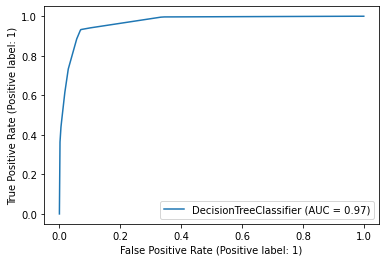

In [58]:
#Evaluating on train and test set

predicted_train=clf.predict(features_train)
plot_roc_curve(clf,X=features_train,y=target_train)

print(confusion_matrix(y_true=target_train,y_pred=predicted_train))
print("F1 Score on training set",f1_score(y_true=target_train,y_pred=predicted_train,sample_weight=target_train))

[[1670  144]
 [  21  196]]
F1 Score on testing data is  0.9491525423728813


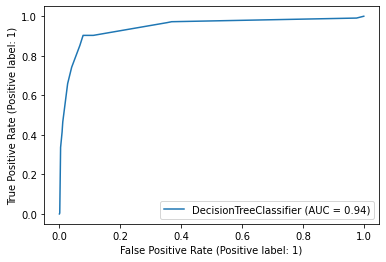

In [59]:
predicted_test=clf.predict(features_val)
plot_roc_curve(clf,X=features_val,y=target_val)

print(confusion_matrix(y_true=target_val,y_pred=predicted_test))
print("F1 Score on testing data is ",f1_score(y_true=target_val,y_pred=predicted_test,sample_weight=target_val))

In [60]:
# Using Grid Search CV

from sklearn.model_selection import GridSearchCV  
clf=DecisionTreeClassifier()

params={'class_weight':['balanced'],
        'max_depth' : [4,5,6,9,10,15],
        'criterion' :['gini','entropy'],
        'min_samples_split' : [5,10,20,30]}

grid_search = GridSearchCV(estimator = clf, param_grid = params, cv = 5, scoring = 'f1', return_train_score=True)
grid_search.fit(features_train,target_train)
print("Best parameters using grid search",grid_search.best_params_)

Best parameters using grid search {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5}


In [61]:
gs_results=grid_search.cv_results_
gs_results['params'][0],gs_results['mean_train_score'][0],gs_results['mean_test_score'][0]

({'class_weight': 'balanced',
  'criterion': 'gini',
  'max_depth': 4,
  'min_samples_split': 5},
 0.7003768629258216,
 0.6780356916879271)

In [62]:
params_val = gs_results['params']
train_score = gs_results['mean_train_score']
test_score = gs_results['mean_test_score']

df = pd.DataFrame(zip(params_val, train_score, test_score), columns = ['param_comb', 'Train_F1', 'Test_F1'])

df.to_excel('grid_search_results.xlsx', index=None)

In [63]:
# Fitting Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rlf = RandomForestClassifier() ### random forest function from  sklearn

params={'n_estimators':[50,100,150,200,400],
        'class_weight':['balanced'], 
        'max_depth':[5,10,12,15],
        'min_samples_split':[5,10,20],
        'max_samples':[0.7,0.8,0.9]} 

grid_search = GridSearchCV(estimator = rlf, param_grid = params, cv = 5, scoring = 'f1', return_train_score=True,n_jobs=3)
grid_search.fit(features_train,target_train)
print("Best parameters using grid search",grid_search.best_params_)

Best parameters using grid search {'class_weight': 'balanced', 'max_depth': 15, 'max_samples': 0.8, 'min_samples_split': 20, 'n_estimators': 200}


[[7169   85]
 [   7  862]]
F1 Score on training set 0.9959560947429231
[[1758   56]
 [  33  184]]
F1 Score on testing data is  0.9177057356608479


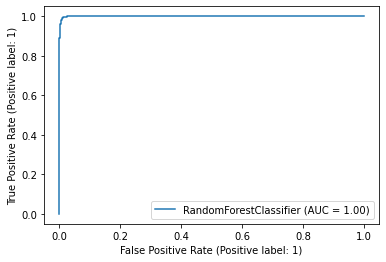

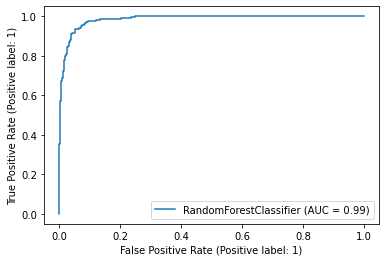

In [66]:
#Evaluating on train and test set

#Train Set
fit_rlf=RandomForestClassifier(class_weight= 'balanced', max_depth= 15, max_samples= 0.8,
                               min_samples_split= 20, n_estimators= 200)
fit_rlf.fit(features_train,target_train)

predicted_train=fit_rlf.predict(features_train)

plot_roc_curve(fit_rlf,X=features_train,y=target_train)

print(confusion_matrix(y_true=target_train,y_pred=predicted_train))
print("F1 Score on training set",f1_score(y_true=target_train,y_pred=predicted_train,sample_weight=target_train))

# Test Set
predicted_test=fit_rlf.predict(features_val)
plot_roc_curve(fit_rlf,X=features_val,y=target_val)

print(confusion_matrix(y_true=target_val,y_pred=predicted_test))
print("F1 Score on testing data is ",f1_score(y_true=target_val,y_pred=predicted_test,sample_weight=target_val))